In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import mdtraj as md
import os
import sys
sys.path.append('/home/xgu/Tiwary/S100/rave/scripts')
import S100CVs as scv

In [2]:
import glob
from itertools import combinations

**RMSD filter**

In [2]:
for prot in ['S100A1', 'S100B']:
    temp = f'temp_{prot}/temp.pdb'
    structure1 = md.load(temp)
    id1 = structure1.top.select('name CA')

    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        rmsd_row = []
        for jj in range(1,641):        
            structure2 = md.load(f't_MSA{ii}_{prot}/structures/pred_{jj}.pdb')
            id2 = structure2.top.select('name CA')
            superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
            # Calculate the RMSD in the unit of nm
            rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
            rmsd_row.append(rmsd)
        np.savetxt(f'RMSD_t_MSA{ii}_{prot}.txt', rmsd_row)

Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


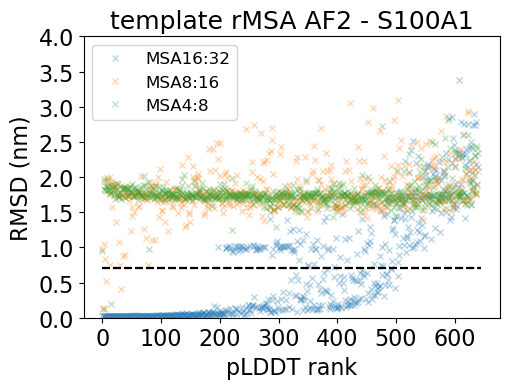

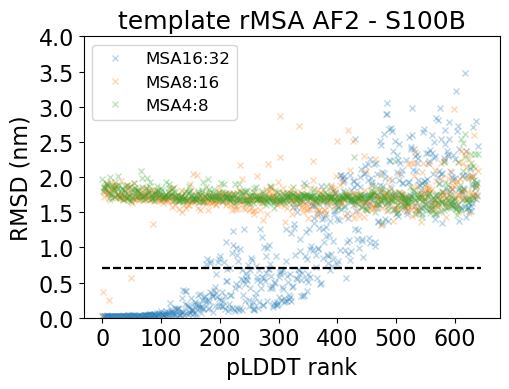

In [61]:
rmsd_cutoff = 0.7

for prot in ['S100A1', 'S100B']:
    fig=plt.figure(figsize=(5.2,4))
    for ii in [16,8,4]:
        print(f"Processing MSA_{ii} ...")
        rmsd_row = np.loadtxt(f'RMSD_t_MSA{ii}_{prot}.txt')
        plt.plot(rmsd_row, 'x', alpha=0.3, label=f'MSA{ii}:{int(ii*2)}', markersize=5)
        plt.hlines(rmsd_cutoff, 0, 645, 'k', linestyles='dashed')
        plt.xlabel('pLDDT rank', fontsize=16)
        plt.ylabel('RMSD (nm)', fontsize=16)
        plt.ylim(0,4)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.title(f"template rMSA AF2 - {prot}", fontsize=18)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.savefig(f"{prot}_t_rAF2_RMSD.png",dpi=300) 

**Peptide-bond length filter**

In [4]:
prots = ['S100A1', 'S100B']

for prot in ['S100A1', 'S100B']:
    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        means = []
        stds = []        
        for jj in range(1,641):   
            traj =  md.load(f't_MSA{ii}_{prot}/structures/pred_{jj}.pdb')

            carbons1 = traj.top.select('chainid 0 and backbone and name C')[:-1]  
            nitrogens1 = traj.top.select('chainid 0 and backbone and name N')[1:]
            carbons2 = traj.top.select('chainid 1 and backbone and name C')[:-1]  
            nitrogens2 = traj.top.select('chainid 1 and backbone and name N')[1:]
            carbons = np.concatenate([carbons1, carbons2])
            nitrogens = np.concatenate([nitrogens1, nitrogens2])

            atom_pairs = np.transpose([carbons, nitrogens])
            distances = np.concatenate(md.compute_distances(traj, atom_pairs))    
    
            means.append(np.mean(distances)*10) #unit: A
            stds.append(np.std(distances)*10)  #unit: A

        np.savetxt(f'peptidebond_mean_t_MSA{ii}_{prot}.txt', means, fmt='%.5f')
        np.savetxt(f'peptidebond_std_t_MSA{ii}_{prot}.txt', stds, fmt='%.5f')

Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


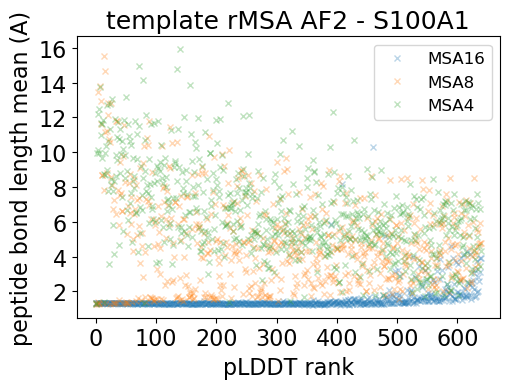

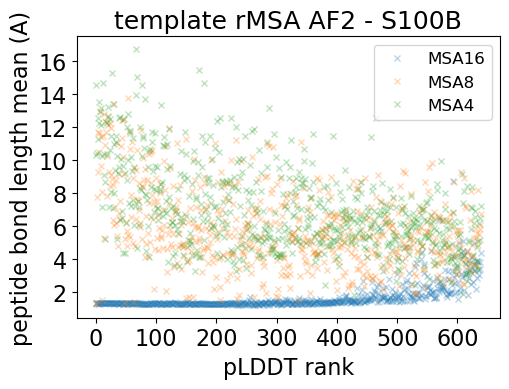

In [5]:
for prot in ['S100A1', 'S100B']:
    fig=plt.figure(figsize=(5.2,4))
    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        means = np.loadtxt(f'peptidebond_mean_t_MSA{ii}_{prot}.txt')
        plt.plot(means, 'x', alpha=0.3, label=f'MSA{ii}', markersize=5)
        # plt.hlines(rmsd_cutoff, 0, 645, 'k', linestyles='dashed')
        plt.xlabel('pLDDT rank', fontsize=16)
        plt.ylabel('peptide bond length mean (A)', fontsize=16)
        # plt.ylim(0,4)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.title(f"template rMSA AF2 - {prot}", fontsize=18)
        plt.legend(fontsize=12)
        plt.tight_layout()
        # plt.savefig(f"{prot}_t_rAF2_RMSD.png",dpi=300) 

Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


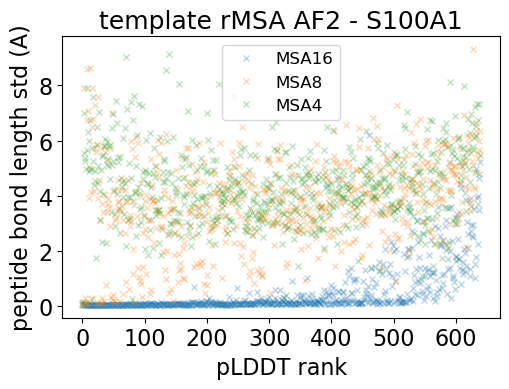

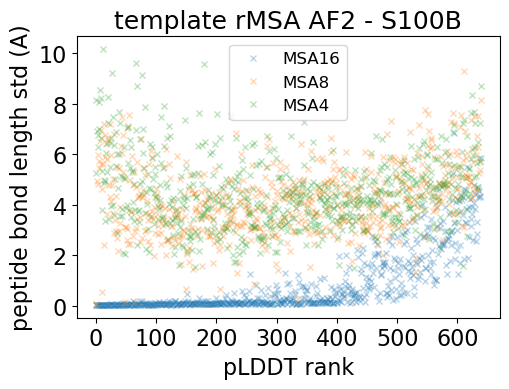

In [6]:
for prot in ['S100A1', 'S100B']:
    fig=plt.figure(figsize=(5.2,4))
    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        stds = np.loadtxt(f'peptidebond_std_t_MSA{ii}_{prot}.txt')
        plt.plot(stds, 'x', alpha=0.3, label=f'MSA{ii}', markersize=5)
        # plt.hlines(rmsd_cutoff, 0, 645, 'k', linestyles='dashed')
        plt.xlabel('pLDDT rank', fontsize=16)
        plt.ylabel('peptide bond length std (A)', fontsize=16)
        # plt.ylim(0,4)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.title(f"template rMSA AF2 - {prot}", fontsize=18)
        plt.legend(fontsize=12)
        plt.tight_layout()
        # plt.savefig(f"{prot}_t_rAF2_RMSD.png",dpi=300) 

**Steric clashes filter**

In [11]:
for prot in ['S100A1', 'S100B']:
    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        inputline = ''      
        for jj in range(1,641):   
            # traj =  md.load(f't_MSA{ii}_{prot}/structures/pred_{jj}.pdb')
            inputline += f't_MSA{ii}_{prot}/structures/pred_{jj}.pdb '
        os.system(f"mdconvert {inputline} -o t_MSA{ii}_{prot}/t_rAF2.xtc")

Processing MSA_16 ...


converted 640 frames, 1464 atoms 
Processing MSA_8 ...


converted 640 frames, 1464 atoms 
Processing MSA_4 ...


converted 640 frames, 1464 atoms 
Processing MSA_16 ...


converted 640 frames, 1454 atoms 
Processing MSA_8 ...


converted 640 frames, 1454 atoms 
Processing MSA_4 ...


converted 640 frames, 1454 atoms 


In [20]:
for prot in ['S100A1', 'S100B']:
    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        traj =  md.load(f't_MSA{ii}_{prot}/t_rAF2.xtc', top=f't_MSA{ii}_{prot}/structures/pred_1.pdb')
        non_hydrogen_indices = traj.top.select('not element H')
        traj_noH = traj.atom_slice(non_hydrogen_indices)
        num_atoms = traj_noH.n_atoms
        # Get all possible atom pairs (combinations)
        all_pairs = list(combinations(range(num_atoms), 2))
        # Get bonded pairs from the topology
        bonded_pairs = [(bond[0].index, bond[1].index) for bond in traj_noH.topology.bonds]
        bonded_set = set(bonded_pairs)
        # Get nonbonded pairs
        non_bonded_pairs = [pair for pair in all_pairs if pair not in bonded_set]
        distances=md.compute_distances(traj_noH, non_bonded_pairs,periodic=False)
        distances = np.min(distances, axis=1)*10  #unit: A
        np.savetxt(f'mindist_nonbonded_heavy_atomPairs_t_MSA{ii}_{prot}.txt', distances, fmt='%.5f') 

Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


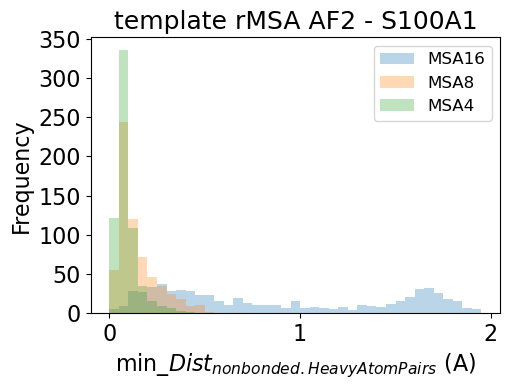

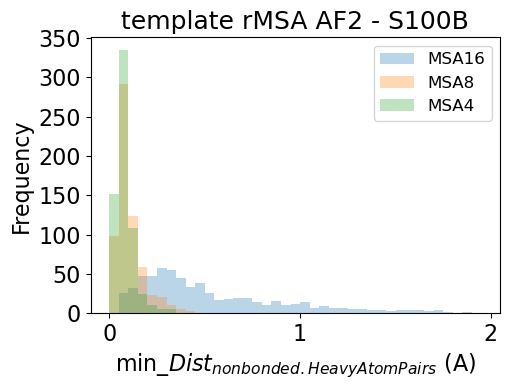

In [31]:
bins=np.arange(0,2,0.05)
for prot in ['S100A1', 'S100B']:
    fig=plt.figure(figsize=(5.2,4))
    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        stds = np.loadtxt(f'mindist_nonbonded_heavy_atomPairs_t_MSA{ii}_{prot}.txt')
        plt.hist(stds, alpha=0.3, label=f'MSA{ii}',bins=bins)#, markersize=5)
        # plt.hlines(rmsd_cutoff, 0, 645, 'k', linestyles='dashed')
        plt.xlabel('min_$Dist_{nonbonded.HeavyAtomPairs}$ (A)', fontsize=16)
        plt.ylabel('Frequency', fontsize=16)
        # plt.ylim(0,4)
        plt.xticks([0,1,2],fontsize=16)
        plt.yticks(fontsize=16)
        plt.title(f"template rMSA AF2 - {prot}", fontsize=18)
        plt.legend(fontsize=12)
        plt.tight_layout()
        # plt.savefig(f"{prot}_t_rAF2_RMSD.png",dpi=300) 

Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


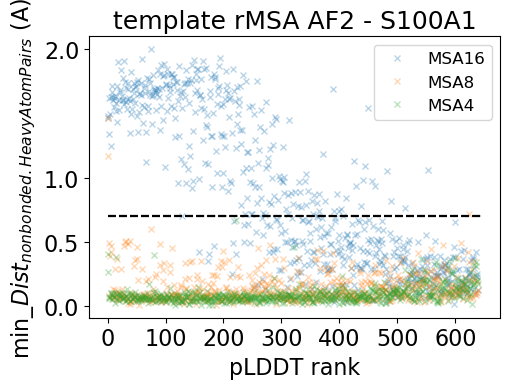

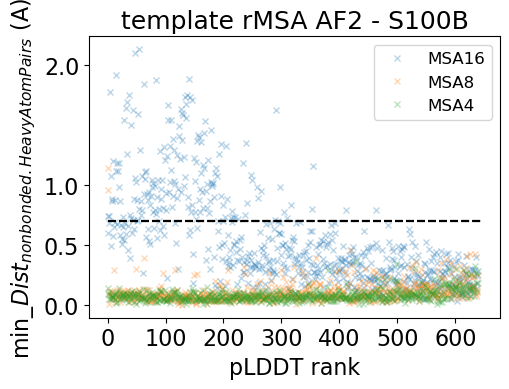

In [92]:
steric_cutoff = 0.7  # A
for prot in ['S100A1', 'S100B']:
    fig=plt.figure(figsize=(5.2,4))
    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        stds = np.loadtxt(f'mindist_nonbonded_heavy_atomPairs_t_MSA{ii}_{prot}.txt')
        plt.plot(stds, 'x', alpha=0.3, label=f'MSA{ii}', markersize=5)
        plt.hlines(steric_cutoff, 0, 645, 'k', linestyles='dashed')
        plt.xlabel('pLDDT rank', fontsize=16)
        plt.ylabel('min_$Dist_{nonbonded.HeavyAtomPairs}$ (A)', fontsize=16)
        # plt.ylim(0,4)
        plt.xticks(fontsize=16)
        plt.yticks([0,0.5,1,2],fontsize=16)
        plt.title(f"template rMSA AF2 - {prot}", fontsize=18)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.savefig(f"{prot}_t_rAF2_min_dist.png",dpi=300)
        

In [75]:
for prot in ['S100A1', 'S100B']:
    for ii in ['16','8','4']:
        df=pd.DataFrame()
        print(f"Processing MSA_{ii} ...")
        traj =  md.load(f't_MSA{ii}_{prot}/t_rAF2.xtc', top=f't_MSA{ii}_{prot}/structures/pred_1.pdb')
        non_hydrogen_indices = traj.top.select('not element H')
        traj_noH = traj.atom_slice(non_hydrogen_indices)
        num_atoms = traj_noH.n_atoms
        # Get all possible atom pairs (combinations)
        all_pairs = list(combinations(range(num_atoms), 2))
        # Get bonded pairs from the topology
        bonded_pairs = [(bond[0].index, bond[1].index) for bond in traj_noH.topology.bonds]
        bonded_set = set(bonded_pairs)
        # Get nonbonded pairs
        non_bonded_pairs = [pair for pair in all_pairs if pair not in bonded_set]
        distances=md.compute_distances(traj_noH, non_bonded_pairs,periodic=False)
        df['residue0'] = [traj.topology.atom(non_bonded_pairs[index][0]).residue.index for index in np.argmin(distances, axis=1)]
        df['residue1']  = [traj.topology.atom(non_bonded_pairs[index][1]).residue.index for index in np.argmin(distances, axis=1)]
        df['min_dist(A)'] = np.min(distances, axis=1)*10
        df.to_csv(f'mindist_nonbonded_heavy_atomPairs_t_MSA{ii}_{prot}.csv', header=True, index=False,)
        

Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...
Processing MSA_16 ...
Processing MSA_8 ...
Processing MSA_4 ...


**Apply filters**

In [56]:
rmsd_cutoff = 0.7 # unit: nm
std_cutoff = 0.2  # unit: A
mean_cutoff = 1.4  # unit: A
steric_cutoff = 0.7  # A
for prot in ['S100A1', 'S100B']:
    inputline = ""
    rmsd = []
    mean = []
    std = []
    steric = []
    for ii in ['16','8','4']:
        print(f"Processing MSA_{ii} ...")
        f_id = []
        rmsd_row = np.loadtxt(f'RMSD_t_MSA{ii}_{prot}.txt')
        mean_row = np.loadtxt(f'peptidebond_mean_t_MSA{ii}_{prot}.txt', )
        std_row = np.loadtxt(f'peptidebond_std_t_MSA{ii}_{prot}.txt', )     
        steric_row = np.loadtxt(f'mindist_nonbonded_heavy_atomPairs_t_MSA{ii}_{prot}.txt')
        for i in range(len(rmsd_row)):
            if (steric_row[i] > steric_cutoff) & (rmsd_row[i] < rmsd_cutoff) & (mean_row[i] < mean_cutoff) & (std_row[i] < std_cutoff):
                f_id.append(i)
                rmsd.append(rmsd_row[i])
                mean.append(mean_row[i])
                std.append(std_row[i])
                steric.append(steric_row[i])
                
        print(len(f_id))
        inputline += " " + " ".join([f't_MSA{ii}_{prot}/structures/pred_{i+1}.pdb' for i in f_id])
        
    np.savetxt(f"RMSD_{prot}_t_rAF2.txt", rmsd)
    np.savetxt(f"peptidebond_mean_{prot}_t_rAF2.txt", mean)
    np.savetxt(f"peptidebond_std_{prot}_t_rAF2.txt", std)
    os.system(f"mdconvert {inputline} -o {prot}_t_rAF2.xtc")

Processing MSA_16 ...
257
Processing MSA_8 ...
1
Processing MSA_4 ...
0


converted 258 frames, 1464 atoms 
Processing MSA_16 ...
166
Processing MSA_8 ...
2
Processing MSA_4 ...
0


converted 168 frames, 1454 atoms 


**Visualization and Clustering using global features**

In [6]:
# compute global features based on anchor point from long MD
ends = [int(i) for i in np.loadtxt('../ends.index')]

for prot in ['S100A1', 'S100B']:
    traj = md.load(f"{prot}_t_rAF2.xtc", top=f'temp_{prot}/temp.pdb')    
    distA, distB = scv.anchor_pairDist(traj)
    dist = [distA, distB]
    dist = np.concatenate(dist)
    np.savetxt(f't_anchorDist_{prot}.txt', dist, fmt='%.5f')

Found 12 centers!
Found 16 centers!


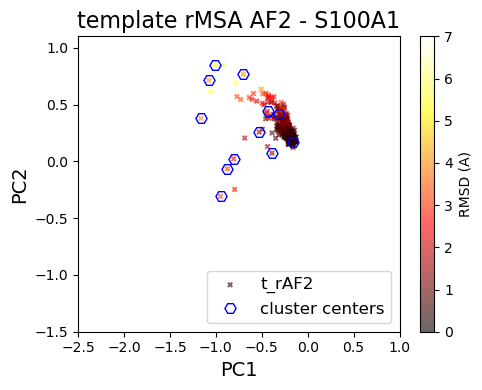

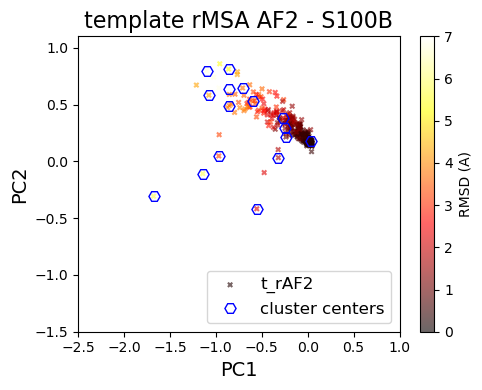

In [59]:
prots = ['S100A1', 'S100B']
pca_mean = np.loadtxt('PCA_from_longMD/mean.txt')
sorted_eigenvectors = np.loadtxt('PCA_from_longMD/PCs.txt')

for prot in prots:
    CVs=np.loadtxt(f't_anchorDist_{prot}.txt')
    centers,listindices=scv.RegSpaceClustering(CVs,0.5,max_centers=50, batch_size=50,randomseed=0) 
    rmsd = np.loadtxt(f"RMSD_{prot}_t_rAF2.txt")    
    mean = np.loadtxt(f"peptidebond_mean_{prot}_t_rAF2.txt")
    std = np.loadtxt(f"peptidebond_std_{prot}_t_rAF2.txt")

    x = CVs - pca_mean
    x_reduced = np.dot(sorted_eigenvectors.transpose(), x.transpose())
    
    cx = centers.T - pca_mean
    cx_reduced = np.dot(sorted_eigenvectors.transpose(), cx.transpose())
    
    plt.figure(figsize=(5,4))
    plt.scatter(x_reduced[0], x_reduced[1], marker='x', c=10*np.concatenate([rmsd, rmsd]), s=10*np.ones(2*len(rmsd)), alpha=0.6,label="t_rAF2", cmap='hot',vmin=0,vmax=7);
    plt.plot(cx_reduced[0], cx_reduced[1], "H",markerfacecolor="none",markeredgecolor="blue",markersize=8,label="cluster centers");
    plt.colorbar(label='RMSD (A)')


    plt.ylim(-1.5,1.1)
    plt.xlim(-2.5,1)
    plt.ylabel('PC2', fontsize=14)
    plt.xlabel('PC1', fontsize=14)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.title(f"template rMSA AF2 - {prot}", fontsize=16)
    plt.legend(fontsize=12, loc='lower right')
    plt.tight_layout()
    plt.savefig(f"{prot}_t_rAF2_rmsd.png",dpi=300)

Found 12 centers!
Found 16 centers!


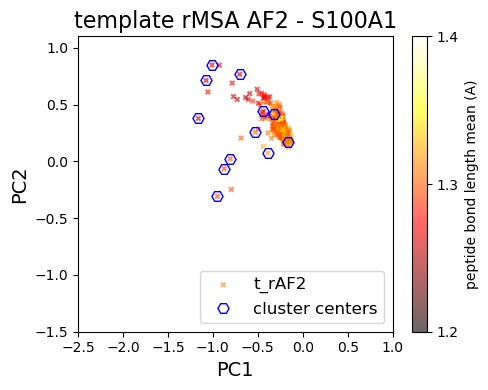

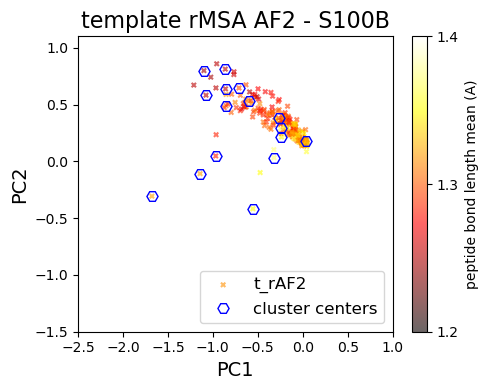

In [60]:
prots = ['S100A1', 'S100B']
pca_mean = np.loadtxt('PCA_from_longMD/mean.txt')
sorted_eigenvectors = np.loadtxt('PCA_from_longMD/PCs.txt')

for prot in prots:
    CVs=np.loadtxt(f't_anchorDist_{prot}.txt')
    centers,listindices=scv.RegSpaceClustering(CVs,0.5,max_centers=50, batch_size=50,randomseed=0) 
    rmsd = np.loadtxt(f"RMSD_{prot}_t_rAF2.txt")    
    mean = np.loadtxt(f"peptidebond_mean_{prot}_t_rAF2.txt")
    std = np.loadtxt(f"peptidebond_std_{prot}_t_rAF2.txt")

    x = CVs - pca_mean
    x_reduced = np.dot(sorted_eigenvectors.transpose(), x.transpose())
    
    cx = centers.T - pca_mean
    cx_reduced = np.dot(sorted_eigenvectors.transpose(), cx.transpose())
    
    plt.figure(figsize=(5,4))
    plt.scatter(x_reduced[0], x_reduced[1], marker='x', c=np.concatenate([mean, mean]), s=10*np.ones(2*len(mean)), alpha=0.6,label="t_rAF2", cmap='hot',vmin=1.2,vmax=1.4);
    plt.plot(cx_reduced[0], cx_reduced[1], "H",markerfacecolor="none",markeredgecolor="blue",markersize=8,label="cluster centers");
    cbar = plt.colorbar(label='peptide bond length mean (A)')
    cbar.set_ticks([1.2, 1.3, 1.4])

    plt.ylim(-1.5,1.1)
    plt.xlim(-2.5,1)
    plt.ylabel('PC2', fontsize=14)
    plt.xlabel('PC1', fontsize=14)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.title(f"template rMSA AF2 - {prot}", fontsize=16)
    plt.legend(fontsize=12, loc='lower right')
    plt.tight_layout()
    plt.savefig(f"{prot}_t_rAF2_mean.png",dpi=300)

Found 12 centers!
Found 16 centers!


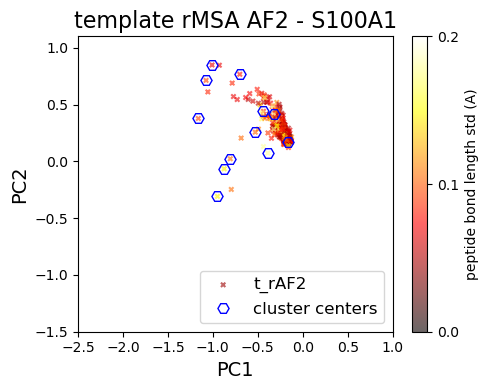

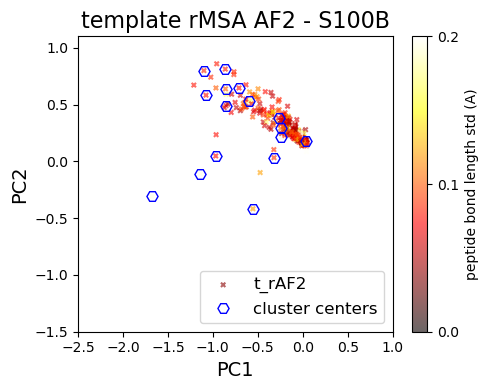

In [61]:
prots = ['S100A1', 'S100B']
pca_mean = np.loadtxt('PCA_from_longMD/mean.txt')
sorted_eigenvectors = np.loadtxt('PCA_from_longMD/PCs.txt')

for prot in prots:
    CVs=np.loadtxt(f't_anchorDist_{prot}.txt')
    centers,listindices=scv.RegSpaceClustering(CVs,0.5,max_centers=50, batch_size=50,randomseed=0)
    rmsd = np.loadtxt(f"RMSD_{prot}_t_rAF2.txt")    
    mean = np.loadtxt(f"peptidebond_mean_{prot}_t_rAF2.txt")
    std = np.loadtxt(f"peptidebond_std_{prot}_t_rAF2.txt")

    x = CVs - pca_mean
    x_reduced = np.dot(sorted_eigenvectors.transpose(), x.transpose())
    
    cx = centers.T - pca_mean
    cx_reduced = np.dot(sorted_eigenvectors.transpose(), cx.transpose())
    
    plt.figure(figsize=(5,4))
    plt.scatter(x_reduced[0], x_reduced[1], marker='x', c=np.concatenate([std, std]), s=10*np.ones(2*len(std)), alpha=0.6,label="t_rAF2", cmap='hot',vmin=0,vmax=0.2);
    plt.plot(cx_reduced[0], cx_reduced[1], "H",markerfacecolor="none",markeredgecolor="blue",markersize=8,label="cluster centers");
    cbar = plt.colorbar(label='peptide bond length std (A)')
    cbar.set_ticks([0, 0.1, 0.2])


    plt.ylim(-1.5,1.1)
    plt.xlim(-2.5,1)
    plt.ylabel('PC2', fontsize=14)
    plt.xlabel('PC1', fontsize=14)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.title(f"template rMSA AF2 - {prot}", fontsize=16)
    plt.legend(fontsize=12, loc='lower right')
    plt.tight_layout()
    plt.savefig(f"{prot}_t_rAF2_std.png",dpi=300)

In [76]:
# save initial structures
prots = ['S100A1', 'S100B']
for prot in prots:
    traj = md.load(f"{prot}_t_rAF2.xtc", top=f'temp_{prot}/temp.pdb')
    CVs=np.loadtxt(f't_anchorDist_{prot}.txt')
    centers,listindices=scv.RegSpaceClustering(CVs,0.5,max_centers=50, batch_size=50,randomseed=0)
    cc = list(set([i%(int(len(CVs)/2)) for i in listindices]))
    for ff in cc:
        frame = traj[ff-1]
        frame_pdb_file = f'../ini_md/{prot}_{ff}.pdb'
        frame.save_pdb(frame_pdb_file)

Found 12 centers!
Found 16 centers!


Found 12 centers!
Found 16 centers!


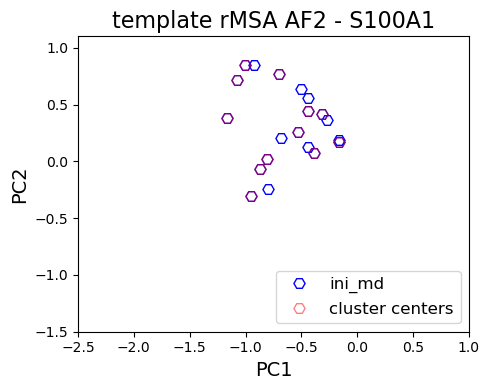

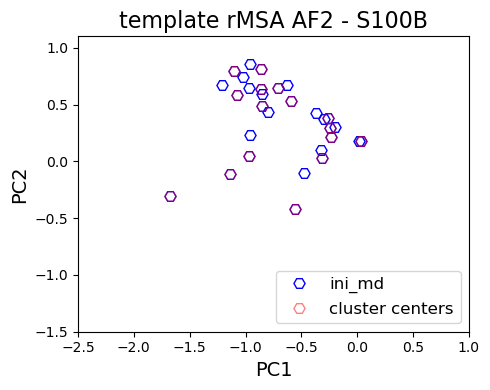

In [81]:
prots = ['S100A1', 'S100B']
pca_mean = np.loadtxt('PCA_from_longMD/mean.txt')
sorted_eigenvectors = np.loadtxt('PCA_from_longMD/PCs.txt')
ends = [int(i) for i in np.loadtxt('../ends.index')]

for prot in prots:
    inis = glob.glob(f'../ini_md/{prot}_*.pdb')
    dist = []
    for ini in inis:
        traj = md.load(ini)       

        anchors = traj.top.select(f'name CA and chainid 0')[ends]
        atom_pairs = []
        for i in range(len(anchors)):
            for j in range(i+1, len(anchors)):
                atom_pairs.append([anchors[i], anchors[j]])
        atom_pairs = np.asarray(atom_pairs)
        dist.append(md.compute_distances(traj, atom_pairs, periodic=False))


        anchors = traj.top.select(f'name CA and chainid 1')[ends]
        atom_pairs = []
        for i in range(len(anchors)):
            for j in range(i+1, len(anchors)):
                atom_pairs.append([anchors[i], anchors[j]])
        atom_pairs = np.asarray(atom_pairs)
        dist.append(md.compute_distances(traj, atom_pairs, periodic=False))

    centers = np.concatenate(dist)  
    cx = centers - pca_mean
    cx_reduced = np.dot(sorted_eigenvectors.transpose(), cx.transpose())
    
    plt.figure(figsize=(5,4))
    plt.plot(cx_reduced[0], cx_reduced[1], "H",markerfacecolor="none",markeredgecolor="blue",markersize=8,label="ini_md")
    
    
    
    CVs=np.loadtxt(f't_anchorDist_{prot}.txt')
    centers,listindices=scv.RegSpaceClustering(CVs,0.5,max_centers=50, batch_size=50,randomseed=0)
    rmsd = np.loadtxt(f"RMSD_{prot}_t_rAF2.txt")    
    mean = np.loadtxt(f"peptidebond_mean_{prot}_t_rAF2.txt")
    std = np.loadtxt(f"peptidebond_std_{prot}_t_rAF2.txt")

    x = CVs - pca_mean
    x_reduced = np.dot(sorted_eigenvectors.transpose(), x.transpose())
    
    cx = centers.T - pca_mean
    cx_reduced = np.dot(sorted_eigenvectors.transpose(), cx.transpose())
    

    # plt.scatter(x_reduced[0], x_reduced[1], marker='x', c=np.concatenate([std, std]), s=10*np.ones(2*len(std)), alpha=0.6,label="t_rAF2", cmap='hot',vmin=0,vmax=0.5);
    plt.plot(cx_reduced[0], cx_reduced[1], "H",markerfacecolor="none",markeredgecolor="red",markersize=8,label="cluster centers",alpha=0.5);
    # plt.colorbar(label='peptide bond length std (A)')

    
    plt.ylim(-1.5,1.1)
    plt.xlim(-2.5,1)
    plt.ylabel('PC2', fontsize=14)
    plt.xlabel('PC1', fontsize=14)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.title(f"template rMSA AF2 - {prot}", fontsize=16)
    plt.legend(fontsize=12, loc='lower right')
    plt.tight_layout()
    # plt.savefig(f"{prot}_t_rAF2_std.png",dpi=300)

In [2]:
# compute pocket features 
for prot in ['S100A1', 'S100B']:
    traj = md.load(f"{prot}_t_rAF2.xtc", top=f'temp_{prot}/temp.pdb')    
    distA, distB = scv.pocket_CVs(traj)
    dist = [distA, distB]
    dist = np.concatenate(dist)
    np.savetxt(f't_pkDist_{prot}.txt', dist, fmt='%.5f')
    print(dist.shape)

(516, 53)
(336, 53)


In [8]:
# compute CVs for S100A1 Holo structures
sys = 'S100A1'
pdbs = glob.glob(f"/home/xgu/Tiwary/S100/rave/Holo/{sys}/*_peptide_free.pdb")
for prot in pdbs:
    traj = md.load(prot)    
    distA, distB = scv.anchor_pairDist(traj)
    dist = [distA, distB]
    dist = np.concatenate(dist)
    np.savetxt(f"{prot.split('_')[0]}_anchorDist.txt", dist, fmt='%.5f')
    
for prot in pdbs:
    traj = md.load(prot)    
    distA, distB = scv.pocket_CVs(traj)
    dist = [distA, distB]
    dist = np.concatenate(dist)
    np.savetxt(f"{prot.split('_')[0]}_pkDist.txt", dist, fmt='%.5f')

In [10]:
traj = md.load('/home/xgu/Tiwary/S100_clean/rAF2/temp_S100A1/temp.pdb')
distA, distB = scv.anchor_pairDist(traj)
dist = [distA, distB]
dist = np.concatenate(dist)
np.savetxt(f"/home/xgu/Tiwary/S100/rave/Holo/{sys}/AF2_anchorDist.txt", dist, fmt='%.5f')
  
distA, distB = scv.pocket_CVs(traj)
dist = [distA, distB]
# dist = np.concatenate(dist)
np.savetxt(f"/home/xgu/Tiwary/S100/rave/Holo/{sys}/AF2_pkDist.txt", dist, fmt='%.5f')

In [3]:
prots = ['S100A1', 'S100B']
for prot in prots:
    traj = md.load(f"{prot}_t_rAF2.xtc", top=f'temp_{prot}/temp.pdb')
    CVs=np.loadtxt(f't_anchorDist_{prot}.txt')
    centers,listindices=scv.RegSpaceClustering(CVs,0.5,max_centers=50, batch_size=50,randomseed=0)
    cc = list(set([i%(int(len(CVs)/2)) for i in listindices]))
    print(len(cc))

Found 12 centers!
10
Found 16 centers!
15
